In [19]:
!jt -t chesterish -cellw 88% -T -N

from jupyterthemes import jtplot
jtplot.style()

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

from sklearn.cluster import KMeans


MAX_ITER = 100
K_MAX = 9
# SEED = np.random.randint(100)
# np.random.seed(53)

In [12]:
# animals = pd.read_csv('CA2Data/animals', header=None, delimiter=' ')
# countries = pd.read_csv('CA2Data/countries', header=None, delimiter=' ')
# fruits = pd.read_csv('CA2Data/fruits', header=None, delimiter=' ')
# veggies = pd.read_csv('CA2Data/veggies', header=None, delimiter=' ')
# # Assign numerical 'category' values corresponding to true labels
# animals[0] = 0
# countries[0] = 1
# fruits[0] = 2
# veggies[0] = 3
# print(animals.shape, countries.shape, fruits.shape, veggies.shape)
# data = pd.concat([animals, countries, fruits, veggies], ignore_index=True)

# # store category data to compute metrics
# # category = np.array(data[0])
# category = np.array(data[0]).reshape(-1,1)
# print(category.dtype)
# category.shape

# # drop category column
# dataset = np.array(data)[:, 1:]
# # data.drop(columns=[0], inplace=True)
# print(dataset.dtype)
# dataset.shape

In [117]:
animals = pd.read_csv('CA2Data/animals', header=None, delimiter=' ').to_numpy()
countries = pd.read_csv('CA2Data/countries', header=None, delimiter=' ').to_numpy()
fruits = pd.read_csv('CA2Data/fruits', header=None, delimiter=' ').to_numpy()
veggies = pd.read_csv('CA2Data/veggies', header=None, delimiter=' ').to_numpy()

animals[:,0] = 0
countries[:,0] = 1
fruits[:,0] = 2
veggies[:,0] = 3

print(animals.shape, countries.shape, fruits.shape, veggies.shape)
print(animals.dtype)

(50, 301) (161, 301) (58, 301) (58, 301)
object


In [118]:
category = np.hstack((animals[:,0], countries[:,0], fruits[:,0], veggies[:,0])).reshape(-1,1).astype(int)
category.shape
print(category.dtype)
# category

int64


In [119]:
# print(animals.shape, countries.shape, fruits.shape, veggies.shape)
dataset = np.vstack((animals[:,1:], countries[:,1:], fruits[:,1:], veggies[:,1:])).astype(float)
print(dataset.shape)
print(dataset.dtype)

(327, 300)
float64


In [156]:
# K-mean * K-medians

def normalise_data(data):
    c = np.linalg.norm(data,axis=1).reshape(-1,1)
    return (1/c)*data


def euclidean_distance(X,Y):
    # Return the Euclidean distance between X and Y
    # return np.sqrt(np.sum((X-Y)**2))
    return np.linalg.norm(X-Y)


def manhattan_distance(X,Y):
    # Return the Manhattan distance between X and Y
    # return np.abs(X-Y).sum()
    return np.sum(np.abs(X-Y))


def fit_model(k, MAX_ITER):
    np.random.seed(53)
    num_centroids = k
#     print(f'k: {k}')
    # Initialise 'k' centroids (y1, .. yk) randomly from the data set
    centroids = data[np.random.randint(data.shape[0], size=num_centroids), :]
#     print(f'length centroids {len(centroids)}')
#     print('Initial centroids\n', centroids[:,:5])
    clusters = None
    for iteration in range(MAX_ITER):
        old_clusters = clusters
        # for the current iteration, get the centroids (index value) assigned to the corresponding datapoints index
        clusters = group_data_to_cluster(centroids)
        if np.all(old_clusters == clusters):
#             print(f"Iteration for k={k} : {iteration}")
            break
        # get updated centroids for current iteration
        centroids = update_centroids(clusters, centroids)
        
    return clusters, centroids


def group_data_to_cluster(centroids):
    num_centroids = len(centroids)
    num_datapoints = len(data)
    # Initialise 'clusters', to later store the centroid index value to the corresponding datapoint index
    clusters = np.zeros((num_datapoints, 1))

    # loop through each datapoint
    for index in range(num_datapoints):
        # Initialise 'distances', to store the 'distance' value from each centroid to the datapoint
        distances = np.zeros((num_centroids, 1))
        # Loop through each centroid
        for centroid_index in range(num_centroids):
            if k_means:
                # for k-means, find the eucledian distance from the datapoint to each centroid
                distance_to_centroid = euclidean_distance(data[index], centroids[centroid_index])
                # update the 'distance' value to the 'distances' array
                distances[centroid_index] = distance_to_centroid

            elif k_medians:
                # for k-medians, find the manhattan distance from the datapoint to each centroid
                distance_to_centroid = manhattan_distance(data[index], centroids[centroid_index])
                # update the 'distance' value to the 'distances' array
                distances[centroid_index] = distance_to_centroid

        # Get the closest centroids index value
        closest_centroid_index = np.argmin(distances)
        # Assign the closest centroid index value to the corresponding datapoint index (in the 'clusters' array)
        clusters[index] = closest_centroid_index
#     print(clusters)
    return clusters


def update_centroids(clusters, centroids):
    num_centroids = len(centroids)
    # Iterate over the centroids, to update them based on the updated cluster data
    for centroid_index in range(num_centroids):
        if k_means:
            # Compute the mean of datapoints for each cluster, and set them as the new centroids
            centroids[centroid_index] = np.mean(data[clusters.flatten() == centroid_index], axis=0)
        elif k_medians:
            # Compute the median of datapoints for each cluster, and set them as the new centroids
            centroids[centroid_index] = np.median(data[clusters.flatten() == centroid_index], axis=0)
    return centroids


def compute_metrics(clusters, category):
    num_datapoints = len(data)
    precision = np.zeros((num_datapoints))
    recall = np.zeros((num_datapoints))
    f_score = np.zeros((num_datapoints))
#     print(f'num_datapoints {num_datapoints}')
#     print(f'clusters\n {clusters}')
#     print(f'category\n {category}')
    for index in range(num_datapoints):
        # get the count of the 'category' from it's assigned 'cluster'
#         print(index)
#         print(clusters[index])
#         print(clusters==clusters[index])
#         print(category[clusters==clusters[index]])
        category_in_cluster_count = np.count_nonzero(category[clusters==clusters[index]] == category[index])
#         print(f'category_in_cluster_count {category_in_cluster_count}')
        # get the total count of datapoints belonging to the 'category' in the dataset
        category_total_count = np.count_nonzero(category==category[index])
        # get the count of datapoints assigned to the 'cluster'
        cluster_elements_count = np.count_nonzero(clusters==clusters[index])
#         print(f'cluster_elements_count {cluster_elements_count}')
        
    #     count = np.sum(cat[clust==clust[index]]==category[index])
        # compute precision
        precision[index] = category_in_cluster_count / cluster_elements_count
        recall[index] = category_in_cluster_count / category_total_count
    #     f_score[index] = 2*precision[index]*recall[index]/(precision[index]+recall[index])
    #     print(f'Count of category {category[index]} in cluster {clust[index]} = {category_in_cluster_count}')
    #     print(f'Count of category {category[index]} in dataset = {category_total_count}')
    #     print(f'Total elements in cluster {clust[index]} = {cluster_elements_count}')
    f_score = 2*precision*recall / (precision+recall)
#     print(precision)
#     print(recall)
#     print(f_score)
    precision = np.round((np.sum(precision) / num_datapoints), 2)
    recall = np.round((np.sum(recall) / num_datapoints), 2)
    f_score = np.round((np.sum(f_score) / num_datapoints), 2)
#     print(f'precision: {precision}')
#     print(f'recall:    {recall}')
#     print(f'f_score:   {f_score}')
    return precision, recall, f_score


def plot_metrics(precisions, recalls, f_scoress):
    k_choices = np.arange(1,K_MAX+1)
    plt.plot(k_choices, precisions, label='precision')
    plt.plot(k_choices, recalls, label='recall')
    plt.plot(k_choices, f_scores, label='f_score')
    plt.xlabel('K')
    plt.ylabel('Metrics')
    plt.xticks(np.arange(1,K_MAX+1))
    plt.legend()
    for i,j in zip(k_choices, precisions):
        plt.annotate(str(j), xy=(i,j))
    for i,j in zip(k_choices, recalls):
        plt.annotate(str(j), xy=(i,j))
    for i,j in zip(k_choices, f_scores):
        plt.annotate(str(j), xy=(i,j))
    if l2_len_norm:
        plt.title("B-CUBED Metrics for {alg}\n with l2 length normalised data".format(alg="k-means" if k_means == True else "k-medians"))
    else:
        plt.title("B-CUBED Metrics for {alg}\n without l2 length normalised data".format(alg="k-means" if k_means == True else "k-medians"))
    plt.show()
    
    
def sklearn_test(k):
    model = KMeans(n_clusters=k)
    model.fit(data)
    print(f"\n\nOutput from SKLEARN for {k} clusters")
    return model.cluster_centers_[:, :4]


For K-means without L2


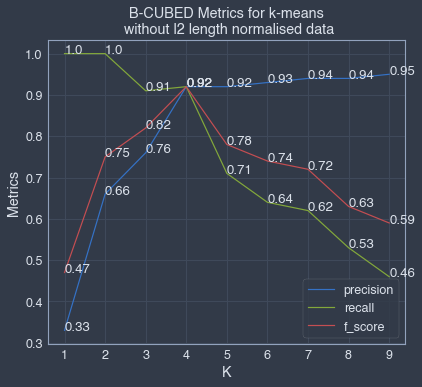


For K-means with L2


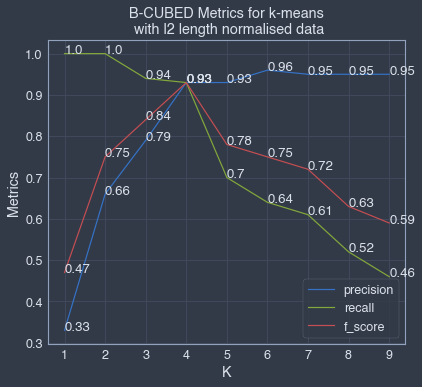


For K-medians without L2


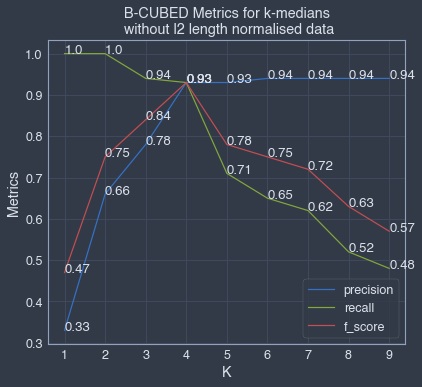


For K-medians with L2


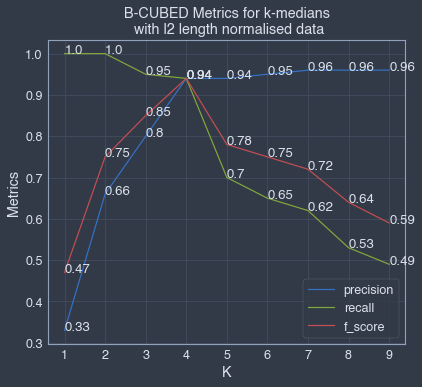

In [157]:
data = deepcopy(dataset)

precisions = np.zeros(K_MAX)
recalls = np.zeros(K_MAX)
f_scores = np.zeros(K_MAX)
# print(precisions)
# print(len(precisions))

# if user_choice == '1':
# Run K_means without l2 length normalised data
print("\nFor K-means without L2")
k_means = True
k_medians = False
l2_len_norm = False
data = deepcopy(dataset)
if l2_len_norm:
    data = normalise_data(data)

for k in range(1, K_MAX+1):
    clusters, centroids = fit_model(k, MAX_ITER)
    precisions[k-1], recalls[k-1], f_scores[k-1] = compute_metrics(clusters, category)
#     print(f'\n\nCentroids from kmeans model without L2 norm for {k} clusters:\n {centroids[:, :4]}')
#     print(sklearn_test(k))
    
# print(pd.DataFrame((precisions, recalls, f_scores), index=['precision', 'recall', 'f-score'], columns=[np.arange(1,K_MAX+1)]))
plot_metrics(precisions, recalls, f_scores)

# elif user_choice == '2':
# Run K_means with l2 length normalised data
print("\nFor K-means with L2")
k_means = True
k_medians = False
l2_len_norm = True
data = deepcopy(dataset)
if l2_len_norm:
    data = normalise_data(data)

for k in range(1, K_MAX+1):
    clusters, centroids = fit_model(k, MAX_ITER)
    precisions[k-1], recalls[k-1], f_scores[k-1] = compute_metrics(clusters, category)
#     print(f'\n\nCentroids from kmeans model with L2 norm for {k} clusters:\n {centroids[:, :4]}')
#     print(sklearn_test(k))
    
# print(pd.DataFrame((precisions, recalls, f_scores), index=['precision', 'recall', 'f-score'], columns=[np.arange(1,K_MAX+1)]))
plot_metrics(precisions, recalls, f_scores)

# elif user_choice == '3':
# Run K_medians without l2 length normalised data
print("\nFor K-medians without L2")
k_means = False
k_medians = True
l2_len_norm = False
data = deepcopy(dataset)
if l2_len_norm:
    data = normalise_data(data)

for k in range(1, K_MAX+1):
    clusters, centroids = fit_model(k, MAX_ITER)
    precisions[k-1], recalls[k-1], f_scores[k-1] = compute_metrics(clusters, category)
#     print(f'\n\nCentroids from kmedians model without L2 norm for {k} clusters:\n {centroids[:, :4]}')
#     print(sklearn_test(k))
    
# print(pd.DataFrame((precisions, recalls, f_scores), index=['precision', 'recall', 'f-score'], columns=[np.arange(1,K_MAX+1)]))
plot_metrics(precisions, recalls, f_scores)

# elif user_choice == '4':
# Run K_medians with l2 length normalised data
print("\nFor K-medians with L2")
k_means = False
k_medians = True
l2_len_norm = True
data = deepcopy(dataset)
if l2_len_norm:
    data = normalise_data(data)

for k in range(1, K_MAX+1):
    clusters, centroids = fit_model(k, MAX_ITER)
    precisions[k-1], recalls[k-1], f_scores[k-1] = compute_metrics(clusters, category)
#     print(f'\n\nCentroids from kmedians model with L2 norm for {k} clusters:\n {centroids[:, :4]}')
#     print(sklearn_test(k))
    
# print(pd.DataFrame((precisions, recalls, f_scores), index=['precision', 'recall', 'f-score'], columns=[np.arange(1,K_MAX+1)]))
plot_metrics(precisions, recalls, f_scores)

# print(centroids)

In [158]:
#### ******************* IGNORE CODE BELOW ********************

#### TESTING THE CODE

# from sklearn.cluster import KMeans
# for k in np.arange(1,K_MAX):
#     model = KMeans(n_clusters=k)
#     model.fit(data)
#     print("\n\nOutput from SKLEARN")
#     print(model.cluster_centers_)

In [100]:
d = np.array([[1,2,3], 
              [2.3,5.2,6],
              [9,11,7]])
print(d)
np.median(d, axis=0)

[[ 1.   2.   3. ]
 [ 2.3  5.2  6. ]
 [ 9.  11.   7. ]]


array([2.3, 5.2, 6. ])

In [59]:
cat = np.array((0,1,2,3,1,3,2,2,3,2,3,0))
print(cat)

clust   = np.array((5,0,6,5,4,5,6,5,5,4,0,7))
print(clust)

[0 1 2 3 1 3 2 2 3 2 3 0]
[5 0 6 5 4 5 6 5 5 4 0 7]


In [32]:
comb = np.vstack((cat, clust))
print(comb.shape)
comb

(2, 12)


array([[0, 1, 2, 3, 1, 3, 2, 2, 3, 2, 3, 0],
       [5, 0, 6, 5, 4, 5, 6, 5, 5, 4, 0, 7]])

In [33]:
np.count_nonzero(comb==0, axis=1)

array([2, 2])

In [34]:
print(np.bincount(cat))
print(np.bincount(clust))

[2 2 4 4]
[2 0 0 0 2 5 2 1]


In [35]:
# temp = cat[clust==0]
# np.count_nonzero(temp==3)
# np.count_nonzero(temp[temp==3])

# print(temp)
# print(temp==3)
# print(temp[temp==3])

np.count_nonzero(cat[clust==0]==3)

1

In [60]:
cat

array([0, 1, 2, 3, 1, 3, 2, 2, 3, 2, 3, 0])

In [37]:
clust

array([5, 0, 6, 5, 4, 5, 6, 5, 5, 4, 0, 7])

In [38]:
len_data = len(clust)
precision = np.zeros((len_data))
recall = np.zeros((len_data))
f_score = np.zeros((len_data))
for i in range(len_data):
    # get the count of the 'category' from it's assigned 'cluster'
    category_in_cluster_count = np.count_nonzero(cat[clust == clust[i]] == cat[i])
    # get the total count of datapoints belonging to the 'category' in the dataset
    category_total_count = np.count_nonzero(cat==cat[i])
    # get the count of datapoints assigned to the 'cluster'
    cluster_elements_count = np.count_nonzero(clust == clust[i])
#     count = np.sum(cat[clust==clust[i]]==cat[i])
    # compute precision
    precision[i] = category_in_cluster_count / cluster_elements_count
    recall[i] = category_in_cluster_count / category_total_count
#     f_score[i] = 2*precision[i]*recall[i]/(precision[i]+recall[i])
#     print(f'Count of category {cat[i]} in cluster {clust[i]} = {category_in_cluster_count}')
#     print(f'Count of category {cat[i]} in dataset = {category_total_count}')
#     print(f'Total elements in cluster {clust[i]} = {cluster_elements_count}')
f_score = 2*precision*recall/(precision+recall)
print(precision)
print(recall)
print(f_score)
print(np.sum(precision)/len_data)
print(np.sum(recall)/len_data)
print(np.sum(f_score)/len_data)

[0.2 0.5 1.  0.6 0.5 0.6 1.  0.2 0.6 0.5 0.5 1. ]
[0.5  0.5  0.5  0.75 0.5  0.75 0.5  0.25 0.75 0.25 0.25 0.5 ]
[0.28571429 0.5        0.66666667 0.66666667 0.5        0.66666667
 0.66666667 0.22222222 0.66666667 0.33333333 0.33333333 0.66666667]
0.6
0.5
0.5145502645502644


In [39]:
print(cat)
print(clust)

[0 1 2 3 1 3 2 2 3 2 3 0]
[5 0 6 5 4 5 6 5 5 4 0 7]


In [40]:
for i in range(10):
    mask = cat[clust==clust[i]]
#     count = np.count_nonzero(mask==cat[i])
    count = np.count_nonzero(cat[clust==clust[i]] == cat[i])
    print(count)
    print(f'Count of category {cat[i]} in cluster {clust[i]} = {count}')
# mask

1
Count of category 0 in cluster 5 = 1
1
Count of category 1 in cluster 0 = 1
2
Count of category 2 in cluster 6 = 2
3
Count of category 3 in cluster 5 = 3
1
Count of category 1 in cluster 4 = 1
3
Count of category 3 in cluster 5 = 3
2
Count of category 2 in cluster 6 = 2
1
Count of category 2 in cluster 5 = 1
3
Count of category 3 in cluster 5 = 3
1
Count of category 2 in cluster 4 = 1


In [41]:
cat[clust==5][cat==2]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 5 but corresponding boolean dimension is 12

In [ ]:
comb[(comb==5) | (comb==3)]

In [ ]:
# # select only classes needed for classification
# data = data[np.where((data[:,-1] == positive_class) | (data[:,-1] == negative_class))]

# # converting class labels to numeric values [+1 or -1] based on the 1 v/s rest approach
# data[data=='class-1'] = 1
# data[(data=='class-2') | (data=='class-3')] = -1

In [ ]:
np.count_nonzero(np.array((0,0,1))==0)

In [ ]:
import numpy
from matplotlib import pyplot

x = numpy.arange(10)
y = numpy.array([5,3,4,2,7,5,4,6,3,2])

fig = pyplot.figure()
ax = fig.add_subplot(111)
ax.set_ylim(0,10)
pyplot.plot(x,y)
for i,j in zip(x,y):
    ax.annotate(str(j),xy=(i,j))

pyplot.show()

In [ ]:
c = np.linalg.norm(data,axis=1).reshape(-1,1)
c
# np.linalg.norm(data[0])
data_normalised = (1/c)*data
data_normalised

In [ ]:
np.linalg.norm(data_normalised,axis=1)

In [ ]:
# np.linalg.norm(data_normalised,axis=0)

In [77]:
cat
cat2 = cat.copy()
cat2[0]=9
print(cat)
print(cat2)

[0 1 2 3 1 3 2 2 3 2 3 0]
[9 1 2 3 1 3 2 2 3 2 3 0]


In [78]:
(cat == cat2).all()

False